In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from core.clustering import pca, plot_pca_grid
from core.semcor_bert_pipeline import load_data
from sklearn.decomposition import PCA

In [6]:
perf_data = pd.read_csv('../data/model_perf.csv')

In [7]:
words = perf_data['Lemma']
pca_data = []

In [19]:
for w in words:
    word, pos = w.split(".")
    data = load_data(word, pos, 'semcor')
    e = data['embeddings']
    for n in np.arange(15, 23):
        var = pca(e, n)
        pca_data.append({'type': w, 'n_pcs': n, 'pct_var_explained': var})

In [20]:
pc_variances = pd.DataFrame(pca_data)
#df = pc_variances.merge(perf_data, left_on = 'type', right_on = 'Lemma')

/anaconda3/envs/bert/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


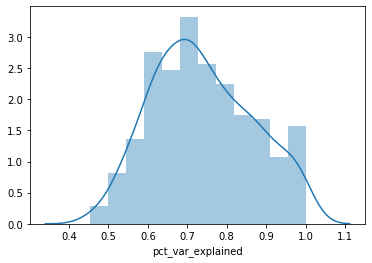

In [21]:
import seaborn as sns
sns.distplot(pc_variances[pc_variances['n_pcs'] == 22]['pct_var_explained'])

/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


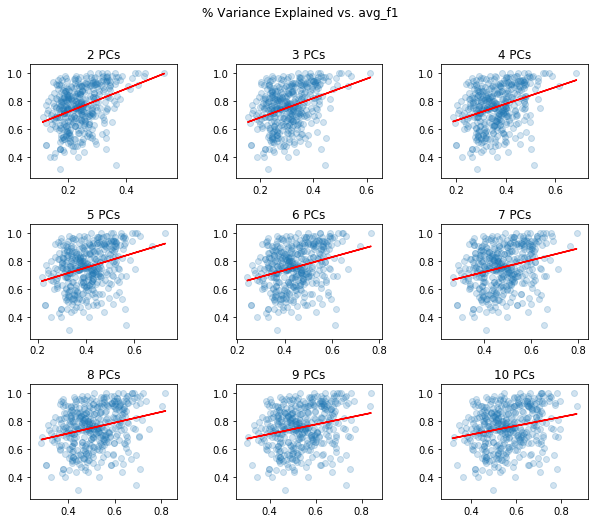

In [11]:
plot_pca_grid(df, 'avg_f1', fit_line = True)

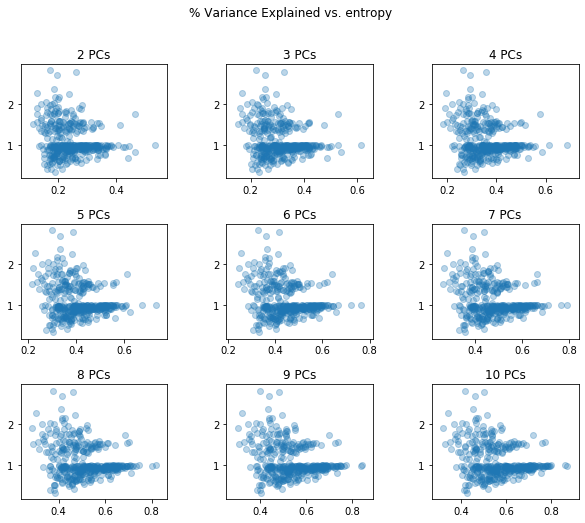

In [7]:
plot_pca_grid(df, 'entropy')

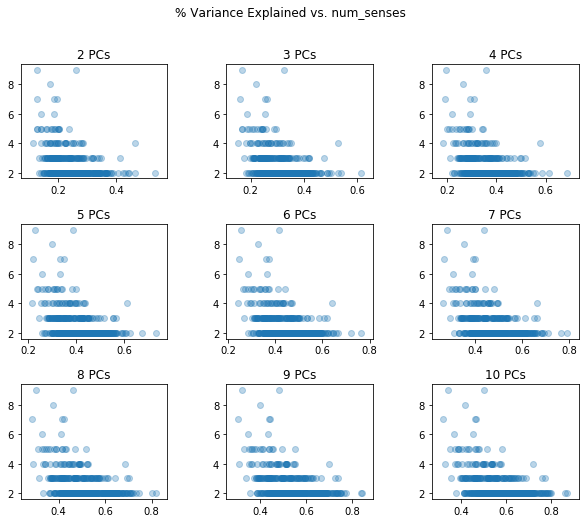

In [8]:
plot_pca_grid(df, 'num_senses')